In [269]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler

Aşağıdaki kodlar bir tek değişkenli veri seti için lineer regression kullanılarak bir model eğitimi yapmayı göstermektedir.

İlk olarak bize ilgili w ve b değerleri için veri setine göre cost hesaplaması yapmak için **"hata kareler"** cost fonksiyonunu tanımlayalım. 

In [270]:
x_train = np.array([98,97,93,86,80,74,67,60,25,50,10,37])
y_train = np.array([134,130,128,125,120,116,112,100,90,92,95,93])
# 
# x_train = np.array([1.0, 2.0])   #features
# y_train = np.array([300.0, 500.0])   #target value

def compute_cost(x,y,w,b):
    m = x.shape[0]
    total_cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost_i = (f_wb - y[i]) ** 2
        total_cost += cost_i
    
    total_cost /= 2 * m
    return total_cost

Şimdi ise J(w,b) *cost function* için kısmi türev hesabı yapmamız gerekiyor. O yüzden w ve b değerlerinin değişim oranını hesaplayalım. 

Bu değişim oranına bakarak **w ve b** parametreleri için yeni değerlerini hesaplayabilirirz.

In [271]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_db /= m
    dj_dw /= m
    
    return dj_dw, dj_db

Şimdi modelimizi artık eğiteceğimiz kısma geldik. Elimizde sağlanan w ve b değerleri için **değişim oranı** hesaplayan bir fonksiyonumuz var.

Artık bu fonksiyonu ve ek birkaç değeri daha kullanarak en düşük cost değerini sağlayan bir w ve b değeri bulabiliriz.

In [272]:
def gradient_descent(x,y,w_in,b_in,num_iters,alpha,cost_function,gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    J_History = []
    p_History = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:
            J_History.append(cost_function(x,y,w,b))
            p_History.append([w,b])
            
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration: {i:4}: Cost {J_History[-1]:0.2e}", 
                  f"dj_dw: {dj_dw:0.3e} dj_db: {dj_db:0.3e}",
                  f"w: {w:0.3e} b: {b:0.5e}")
            
    return w, b, J_History, p_History

In [273]:
w_init = 0
b_init = 0

iterations = 200000
tmp_alpha = 1.0e-4  #1.0e-2 demek 1.0 * 10^-2 demektir.

w_final, b_final, j_History, p_history = gradient_descent(x_train, y_train,w_init, b_init, iterations, tmp_alpha,compute_cost, compute_gradient)

print(f"(w,b) değerleri yapay zeka taraından tespit edilmiştir: ({w_final, b_final})" )

Iteration:    0: Cost 1.96e+03 dj_dw: -7.610e+03 dj_db: -1.112e+02 w: 7.610e-01 b: 1.11250e-02
Iteration: 20000: Cost 2.67e+02 dj_dw: 1.150e-01 dj_db: -8.824e+00 w: 1.262e+00 b: 2.07339e+01
Iteration: 40000: Cost 1.51e+02 dj_dw: 8.417e-02 dj_db: -6.458e+00 w: 1.064e+00 b: 3.58930e+01
Iteration: 60000: Cost 8.91e+01 dj_dw: 6.160e-02 dj_db: -4.726e+00 w: 9.195e-01 b: 4.69874e+01
Iteration: 80000: Cost 5.59e+01 dj_dw: 4.509e-02 dj_db: -3.459e+00 w: 8.136e-01 b: 5.51072e+01
Iteration: 100000: Cost 3.81e+01 dj_dw: 3.300e-02 dj_db: -2.532e+00 w: 7.362e-01 b: 6.10498e+01
Iteration: 120000: Cost 3.81e+01 dj_dw: 2.415e-02 dj_db: -1.853e+00 w: 6.795e-01 b: 6.53990e+01
Iteration: 140000: Cost 3.81e+01 dj_dw: 1.767e-02 dj_db: -1.356e+00 w: 6.380e-01 b: 6.85820e+01
Iteration: 160000: Cost 3.81e+01 dj_dw: 1.294e-02 dj_db: -9.925e-01 w: 6.077e-01 b: 7.09116e+01
Iteration: 180000: Cost 3.81e+01 dj_dw: 9.467e-03 dj_db: -7.263e-01 w: 5.854e-01 b: 7.26166e+01
(w,b) değerleri yapay zeka taraından tespit e

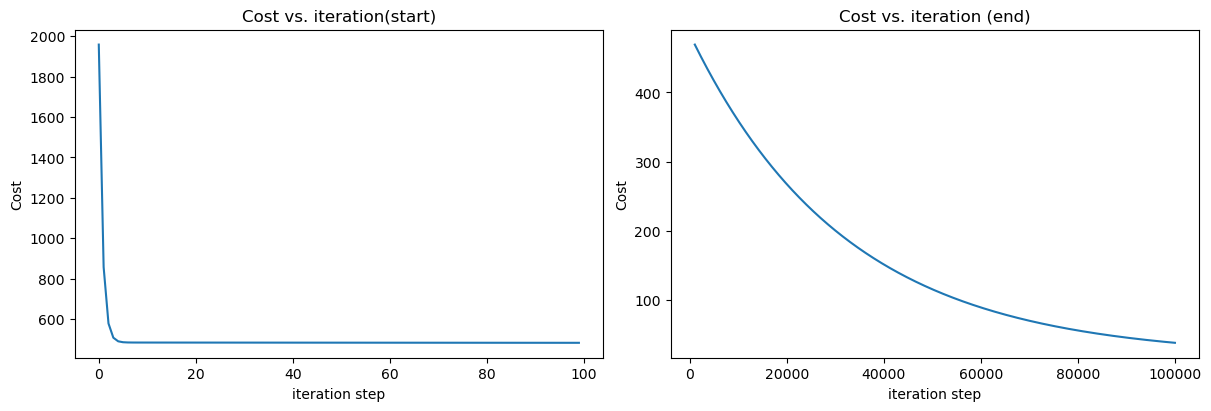

In [274]:
# plot cost versus iteration => Adım adım çizdirme  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_History[:100])
ax2.plot(1000 + np.arange(len(j_History[1000:])), j_History[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [275]:
print(f"Tahiri öğrencisinin tahmini iq değeri: {w_final*98.0 + b_final:0.1f}")
print(f"Sadık öğrencisinin tahmini iq değeri: {w_final * 92.0 + b_final:0.1f}")
print(f"Ağbal öğrencisinin tahmini iq değeri: {w_final * 100.0 + b_final:0.1f}")

Tahiri öğrencisinin tahmini iq değeri: 129.6
Sadık öğrencisinin tahmini iq değeri: 126.2
Ağbal öğrencisinin tahmini iq değeri: 130.8


### Multiple Features With Lineer Regression
Şimdi ise çok değişkenli bir model inşa edelim. Burada kaggle'dan aldığımız veriler ile bir model eğitimi gerçekleştireceğiz.

In [276]:
#Öncelikle cost hesabı yapan fonksiyonumuzu yazalım

def compute_cost_2(x, y, w, b):
    """
    
    :param x: Burada x artık bir matrixtir. İçinde bir sürü satır bulundurur.
    :param y: 
    :param w: Burada w artık tek boyutlu bir dizidir/vektordür.
    :param b: 
    :return: 
    """
    m = x.shape[0]
    total_cost = 0
    
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        cost_i = (f_wb - y[i]) ** 2
        total_cost += cost_i
    total_cost = total_cost / 2 * m
    return total_cost
    

In [277]:
# Şimdi ise gradient descent, yardımcı fonksiyonu olan compute_gradient (eğim hesabı) fonksiyonunu yazalım

def compute_gradient_2(x, y, w, b):
    
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i][j] 
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [278]:
# Son olarak gradient descent fonksiyonumuzu da yazalım.

def gradient_descent_2(x, y, w_init, b_init, iterations, alpha ,cost_function, gradient_function):
    
    J_History = []
    p_History = []
    w = w_init
    b = b_init
    
    for i in range(iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        if i < 100000:
            J_History.append(cost_function(x,y,w,b))
            p_History.append([w,b])
        
        if i % math.ceil(iterations / 10) == 0:
            print(f"Iteration: {i:4}: Cost {J_History[-1]:0.2e}")
    
    return w, b, J_History, p_History       
        

Artık modelimizi oluşturduğumuza göre eğitim verileri üzerinde düzenlemeler yapmamız gerekiyor. Onları en temiz şekilde modelimize vermeliyiz.

In [279]:
data_frame = pd.read_csv("jamb_exam_results.csv")
data_frame.drop(columns=["Student_ID"], inplace=True)
data_frame.dropna(axis=0, how='any', inplace=True)
data_frame.replace({
    "Gender": {"Male": 1, "Female": 0},
    "Parent_Education_Level": {"Primary": 0, "Secondary": 1, "Tertiary": 2},
    "Parent_Involvement": {"Low": 0, "Medium": 1, "High": 2},
    "Access_To_Learning_Materials": {"Yes": 1, "No": 0},
    "IT_Knowledge": {"Low": 0, "Medium": 1, "High": 2},
    "Socioeconomic_Status": {"Low": 0, "Medium": 1, "High": 2},
    "Extra_Tutorials": {"Yes": 1, "No": 0},
    "School_Type": {"Public": 0, "Private": 1},
    "School_Location": {"Urban": 0, "Rural": 1}
}, inplace=True)
data_frame

/tmp/ipykernel_6322/1313544236.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_frame.replace({


,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,0,0,1,1,2,1,17,1,0,2,2
2,182,29,87,2,9.6,0,1,1,1,2,1,20,0,2,2,2
3,210,29,99,2,2.6,0,0,0,1,1,2,22,0,1,2,1
4,199,12,98,3,8.8,0,0,0,1,1,1,22,0,1,2,1
5,202,25,85,2,13.6,0,0,1,0,1,0,15,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,233,19,81,3,7.8,0,0,1,0,0,0,22,1,1,1,1
4995,183,20,74,2,10.6,0,0,1,0,0,0,16,1,1,0,2
4996,179,0,80,2,20.0,0,1,0,1,1,1,22,1,0,1,1
4997,261,17,89,3,11.3,0,0,0,0,0,2,18,1,1,0,3


In [280]:
# Şimdi biraz scailing ile verimizi daha iyi hale getirelim.

datas = data_frame
nn = np.array(datas)

X_data = data_frame.loc[:, data_frame.columns != "JAMB_Score"]
Y_data = data_frame["JAMB_Score"]

X_train = np.array(X_data)
Y_train = np.array(Y_data)

scaler = StandardScaler()
x_norm = scaler.fit_transform(X_train)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

x_norm

Peak to Peak range by column in Raw        X:[40. 50.  4. 20.  1.  1.  1.  1.  2.  2.  7.  1.  2.  2.  4.]
Peak to Peak range by column in Normalized X:[4.16381809 5.28333287 4.06743399 4.12271437 2.30958847 2.02115859
 2.00892999 2.12589084 2.63784275 2.60748311 3.04734468 2.00033324
 2.67388241 2.53896202 4.02775685]


array([[ 0.24051648, -0.67769127,  1.4885383 , ..., -1.26731224,
         1.30562832,  0.18281252],
       [ 0.96918465,  0.27330865, -0.5451787 , ...,  1.40657017,
         1.30562832,  0.18281252],
       [ 0.96918465,  1.54130854, -0.5451787 , ...,  0.06962897,
         1.30562832, -0.82412669],
       ...,
       [-2.04958347, -0.46635795, -0.5451787 , ..., -1.26731224,
         0.03614731, -0.82412669],
       [-0.27996078,  0.48464196,  0.4716798 , ...,  0.06962897,
        -1.2333337 ,  1.18975173],
       [-0.48815168,  1.22430857, -0.5451787 , ...,  0.06962897,
         0.03614731, -0.82412669]])

In [281]:
b_init_2 = 0
w_init_2 = np.zeros(x_norm.shape[1])

num_of_iterations = 1000
temp_A = 9.0e-1

w_f, b_f, J_History, P_history = gradient_descent_2(x_norm, Y_train,w_init_2, b_init_2, num_of_iterations, temp_A,compute_cost_2, compute_gradient_2)

print(f"(w,b) değerleri yapay zeka tarafından tespit edilmiştir: ({w_f, b_f})" )

Iteration:    0: Cost 1.79e+10
Iteration:  100: Cost 1.30e+10
Iteration:  200: Cost 1.30e+10
Iteration:  300: Cost 1.30e+10
Iteration:  400: Cost 1.30e+10
Iteration:  500: Cost 1.30e+10
Iteration:  600: Cost 1.30e+10
Iteration:  700: Cost 1.30e+10
Iteration:  800: Cost 1.30e+10
Iteration:  900: Cost 1.30e+10
(w,b) değerleri yapay zeka tarafından tespit edilmiştir: ((array([15.58803137,  9.17944008, 10.6193842 , -3.40507626,  2.64994647,
       -0.87285422,  2.75970867,  1.69369252,  5.11118627,  4.77210079,
       -0.33577195, -0.55406824,  5.06077314,  2.18699865,  1.91858471]), 176.5694816256997))


In [282]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, Y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")

SGDRegressor()
number of iterations completed: 17, number of weight updates: 69854.0
model parameters: w: [15.74522838  9.65233816 10.63766983 -3.84510627  1.49001735 -0.90665681
  2.5443116   2.03377464  5.21387433  5.06291987 -0.37852778 -0.04608385
  5.4570907   2.03541032  2.06059226], b:[176.61681587]


In [287]:
x_temp = x_norm[125]
f_wb = np.dot(w_f,x_temp) + b_f
print(f"Actual Value: {Y_train[125]}, Predict: {f_wb}")

f = np.dot(w_norm,x_temp) + b_norm
print(f"Actual Value: {Y_train[125]}, Predict: {f}")

Actual Value: 224, Predict: 200.48259490728174
Actual Value: 224, Predict: [201.32774007]


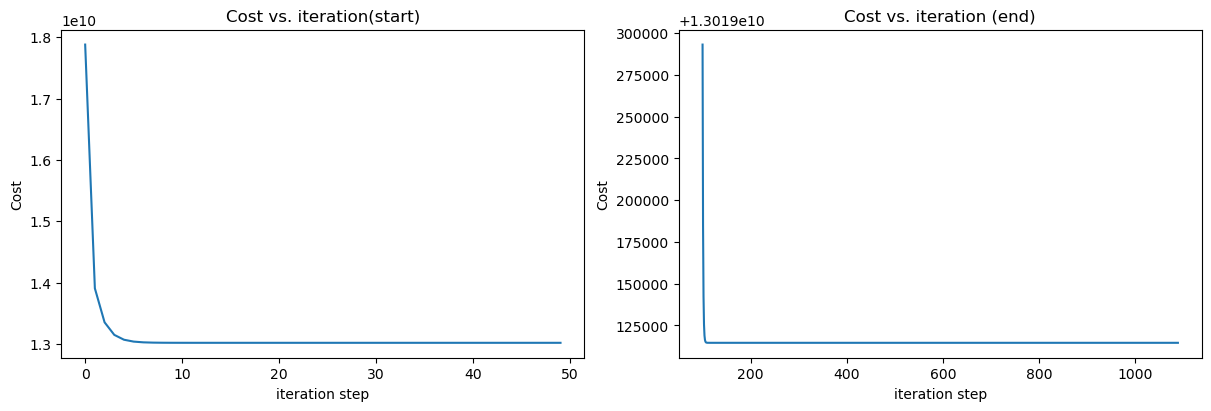

In [284]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_History[:50])
ax2.plot(100 + np.arange(len(J_History[10:])), J_History[10:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

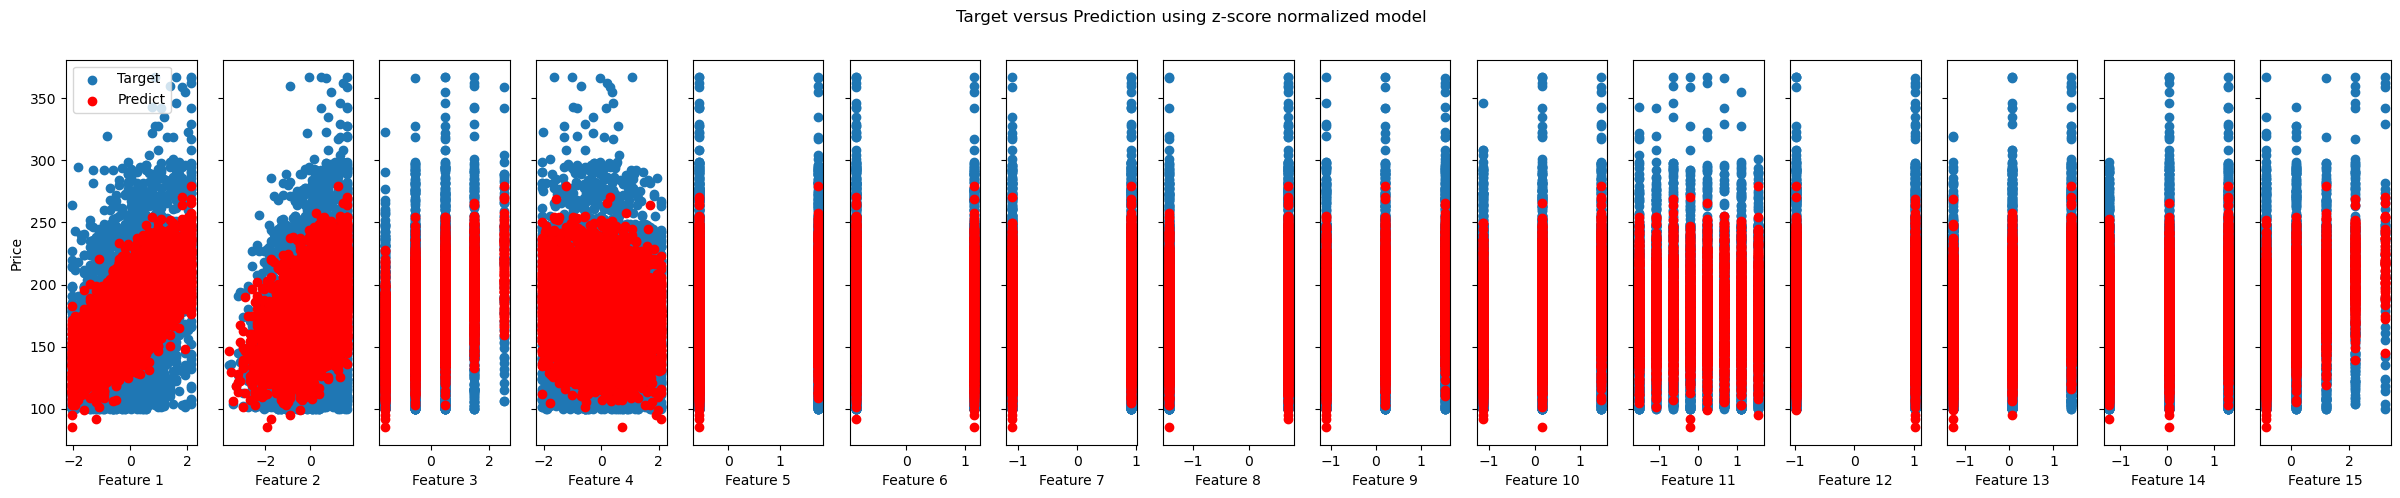

In [285]:
y_pred = sgdr.predict(x_norm)  # y_pred dizinizi uygun bir tahmin dizisi ile değiştirin

# Grafik ayarları
fig, ax = plt.subplots(1, 15, figsize=(30, 5), sharey=True)  # Genişliği artırarak görünümü iyileştiriyoruz

# Her özellik için scatter plot
for i in range(15):
    ax[i].scatter(x_norm[:, i], Y_train, label='Target')
    ax[i].scatter(x_norm[:, i], y_pred, color="red", label='Predict')
    ax[i].set_xlabel(f"Feature {i+1}")

# Ortak Y ekseni etiketi ve başlık
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target versus Prediction using z-score normalized model")
plt.show()